<a href="https://colab.research.google.com/github/danielthomas06/KaggleML/blob/main/03_Introduction_to_computer_vision_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Convolutional Neural Networks and Computer Vision with TensorFLow

Computer vision is the practice of writing algorithms which can discover patterns is visual data. SUch as the camera of a self-driving car


### Get the data

The images we're working with are from the Food101 dataset.

However we have modified it two include only two food types - pizzas and steak

**Note:** We are starting with a smaller problem to understand what works and what doesn't

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-31 06:30:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.250.101.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   105MB/s    in 1.0s    

2021-05-31 06:30:52 (105 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

Become one with it. This is very crucial and to understand the data. For deep learning it is to visualise the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
print("hello world")

hello world


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


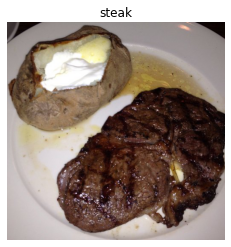

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

## Binary Classification: Let's break it down

1. Become one with the data (visualise, visualise, visualise)
2. Preprocess the data (prepared it for our model, scaling/ normalization)
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve the model
7. Repeat until satisfied (experiment)

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


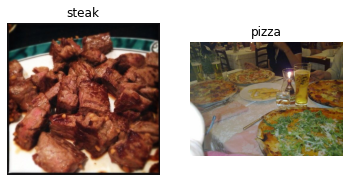

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)


In [ ]:
# DEfine the directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is turn our data into **batches.**

A batch is a small subset of data, Rather than look at all ~10,000 images at a time, model might look only at 32 at a time.

Since all the images won't fit into the memory of the processor.
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32? because ya lecun says it so....


In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [ ]:
# Load in our image data from directories and them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Get a smaple of a training data batch
images, labels = train_data.next() # Get the next batch of images/batches in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.7254902 , 0.44705886, 0.13333334],
          [0.7725491 , 0.4901961 , 0.19215688],
          [0.7686275 , 0.48235297, 0.21176472],
          ...,
          [0.54901963, 0.27450982, 0.07058824],
          [0.5686275 , 0.2901961 , 0.07058824],
          [0.57254905, 0.29411766, 0.07450981]],
 
         [[0.7372549 , 0.45882356, 0.15294118],
          [0.75294125, 0.47058827, 0.18039216],
          [0.74509805, 0.45098042, 0.19607845],
          ...,
          [0.5529412 , 0.2901961 , 0.08235294],
          [0.56078434, 0.2901961 , 0.07450981],
          [0.5294118 , 0.25882354, 0.03529412]],
 
         [[0.74509805, 0.46274513, 0.16470589],
          [0.7411765 , 0.45882356, 0.16862746],
          [0.7411765 , 0.44705886, 0.19215688],
          ...,
          [0.5254902 , 0.2784314 , 0.07058824],
          [0.5411765 , 0.28627452, 0.06666667],
          [0.54509807, 0.2901961 , 0.07058824]],
 
         ...,
 
         [[0.5568628 , 0.3529412 , 0.12941177],
          [0.57254

In [ ]:
labels

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

### 3. Create aCNN model (Start with a baseline)

A baseline is a relatively simple model or existing model and we try to improve the result of model.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model
model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224,3)),# Input layer
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")# Output layer
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###Fit the model

In [ ]:
#Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))
                        #callback=[tensorboard_callback])

Epoch 1/5
47/47 [==============================] - 41s 198ms/step - loss: 0.6207 - accuracy: 0.6687 - val_loss: 0.4791 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3907 - accuracy: 0.8340 - val_loss: 0.3801 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.2241 - accuracy: 0.9227 - val_loss: 0.5549 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.0686 - accuracy: 0.9807 - val_loss: 0.5552 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.6774 - val_accuracy: 0.7940


### 5. Evaluating our model:

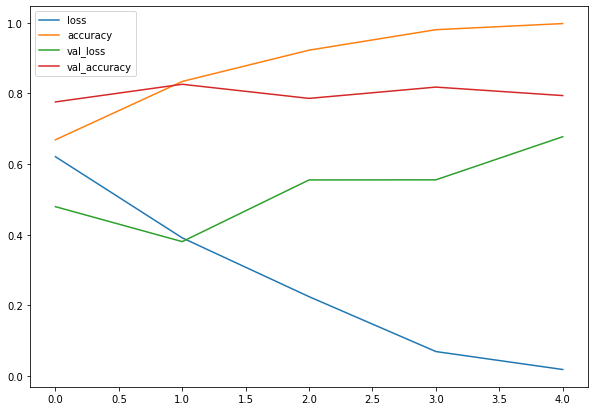

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  returns separate loss curve for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note**: When a model's **validation loss start to increase**, its liking that the model is *overfitting* the training dataset and hence it will diminish the model's ability to predict unseen data correctly.

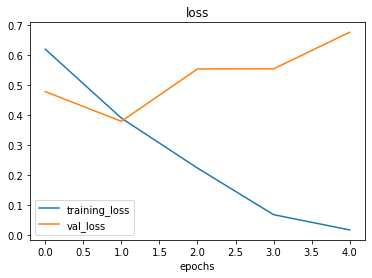

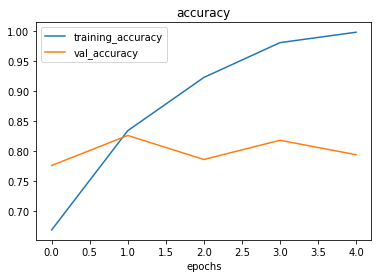

In [ ]:
#Check out loss and accuracy of model_4
plot_loss_curves(history_4)

###6. Adjust the model parameters

0. Create the baseline
1. Improve the baseline
2. Reduce the overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization (such as MaxPool2D)
* Add more data

*Reducing Overfitting is also known as regularization*


In [ ]:
# Createthe model (this will be new baseline)
model_5 = Sequential([
                      Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
                      ])

In [ ]:
# Compile the mode
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=5,
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
5/5 [==============================] - 4s 705ms/step - loss: 0.7147 - accuracy: 0.5577 - val_loss: 0.6907 - val_accuracy: 0.5080
Epoch 2/5
5/5 [==============================] - 3s 641ms/step - loss: 0.6731 - accuracy: 0.5750 - val_loss: 0.6452 - val_accuracy: 0.7040
Epoch 3/5
5/5 [==============================] - 3s 641ms/step - loss: 0.6519 - accuracy: 0.6687 - val_loss: 0.6391 - val_accuracy: 0.6100
Epoch 4/5
5/5 [==============================] - 3s 639ms/step - loss: 0.6319 - accuracy: 0.6500 - val_loss: 0.6115 - val_accuracy: 0.6420
Epoch 5/5
5/5 [==============================] - 3s 642ms/step - loss: 0.5521 - accuracy: 0.7688 - val_loss: 0.6000 - val_accuracy: 0.6700


In [ ]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

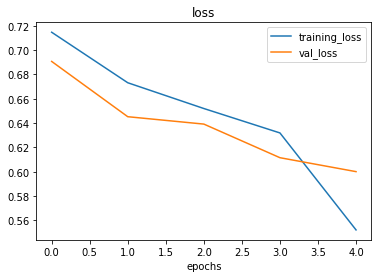

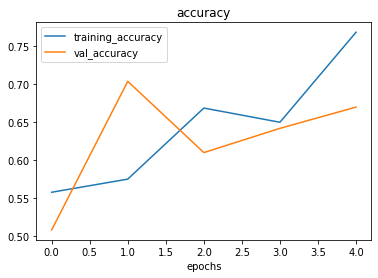

In [ ]:
#Plot loss curves
plot_loss_curves(history_5)

###Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                          
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create IMage DataGenrator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

**What is Data Augmentation**

Data Augmentation is the process of altering our training data, leading it to have more dicersity and in turn allowing our models to learn more generalizable patterns. Altering means flipping, cropping etc.

In [ ]:
#Import data and augment it from training directory
print("augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode="binary",
                                         shuffle=True)
# Create non_augmente train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Create non_augmente test data batches
IMG_SIZE=(224,224)
print("Non-augmented testing data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary")
                                               

augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented testing data:
Found 500 images belonging to 2 classes.


In [ ]:
# Visualise augmented data
images, labels = train_data.next()
images_aug, labels_aug = train_data_augmented.next()

showing image number: 2


(-0.5, 223.5, 223.5, -0.5)

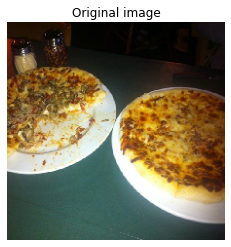

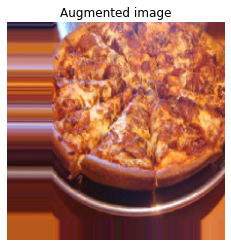

In [ ]:
# Show the original and augmented image
import random
random_number = random.randint(0,31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(images_aug[random_number])
plt.title("Augmented image")
plt.axis(False)

Now we've seen what aufmented training data looks like, let's build a model and see how it learns augmented data

In [ ]:
#Create a model
model_6 = Sequential([
                      Conv2D(10, 3,activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compilet the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 421ms/step - loss: 0.6585 - accuracy: 0.5907 - val_loss: 0.5922 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 20s 416ms/step - loss: 0.5893 - accuracy: 0.6867 - val_loss: 0.4813 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 20s 418ms/step - loss: 0.5204 - accuracy: 0.7407 - val_loss: 0.3708 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 20s 415ms/step - loss: 0.5360 - accuracy: 0.7267 - val_loss: 0.3873 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 20s 419ms/step - loss: 0.5224 - accuracy: 0.7447 - val_loss: 0.4107 - val_accuracy: 0.8160


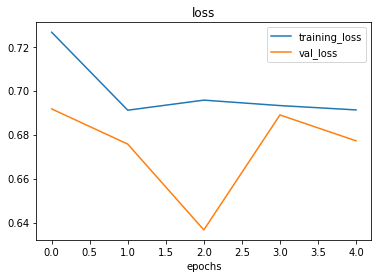

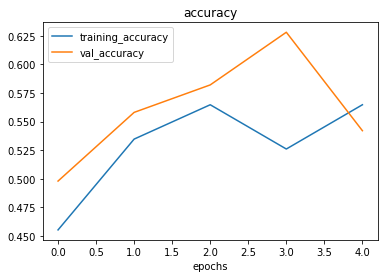

In [ ]:
#Check our models training curves
plot_loss_curves(history_6)

# Multi-Class Image Classification

10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data
3. Create the model
4. Fit the model (overfit the model to make sure it works.)
5. Evaluate the model
6. Adjust the different hyperparameters and improve the model
7. Beat the baseline
8 repeat until satisfied. 

In [ ]:
###1. Import the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-31 14:24:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c03::80, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   138MB/s    in 3.6s    

2021-05-31 14:24:24 (138 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#Walk through 10 classses food data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 10 directori

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Let's get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (482, 512, 3)


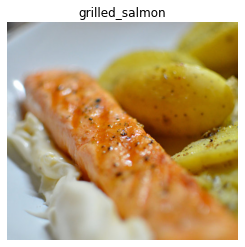

In [ ]:
# Visualise
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

###2. Preprocess the data

In [ ]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Create a model(start with a baseline)
Trying to replicate the CNN explainer website model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create the model
model_8 = Sequential([
                      Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

#Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
### 4. Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
 26/235 [==>...........................] - ETA: 29s - loss: 2.5923 - accuracy: 0.1130

KeyboardInterrupt: ignored

###5. Evaluate the model

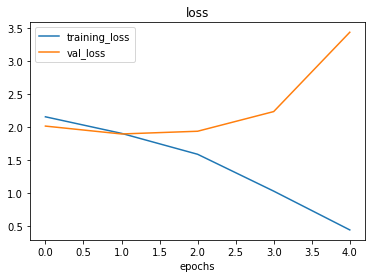

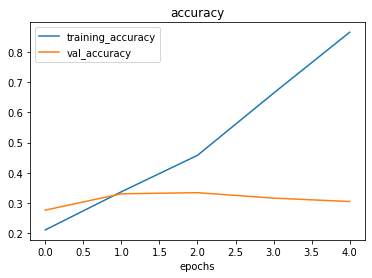

In [ ]:
# Plot loss curves
plot_loss_curves(history_8)

Well... it seems our model is **overfitting** the training set quite badly... it learns the training data very well whereas it doesn't predict the test data correctly.

###6. Adjust the model hyperparameters(to beat baseline/ reduce overfitting)

* Get more data
* Data Augmentation
* Better data
* Use less layers or reduce the hidden units
* Use Transfer Learning - transfer learning leverages another model which has learned and use it for this model.



In [ ]:
#Try to simplify the model to reduce overfitting
# Let's try to remove 2 convolutional layers

model_9 = Sequential([
                      Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
                             MaxPool2D(),
                             Conv2D(10,3,activation="relu"),
                             MaxPool2D(),
                             Flatten(),
                             Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 171ms/step - loss: 2.1751 - accuracy: 0.2367 - val_loss: 1.9527 - val_accuracy: 0.3200
Epoch 2/5
235/235 [==============================] - 40s 170ms/step - loss: 1.7462 - accuracy: 0.4088 - val_loss: 1.9530 - val_accuracy: 0.3400
Epoch 3/5
235/235 [==============================] - 40s 171ms/step - loss: 1.3444 - accuracy: 0.5600 - val_loss: 2.0832 - val_accuracy: 0.3132
Epoch 4/5
235/235 [==============================] - 40s 172ms/step - loss: 0.9276 - accuracy: 0.7093 - val_loss: 2.3370 - val_accuracy: 0.2924
Epoch 5/5
235/235 [==============================] - 40s 171ms/step - loss: 0.5423 - accuracy: 0.8428 - val_loss: 2.7399 - val_accuracy: 0.2816


In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model with augmented training data
model_10 = tf.keras.models.clone_model(model_8)

#Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 100s 424ms/step - loss: 2.2021 - accuracy: 0.1841 - val_loss: 2.0127 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 99s 423ms/step - loss: 2.0655 - accuracy: 0.2692 - val_loss: 1.9567 - val_accuracy: 0.2912
Epoch 3/5
235/235 [==============================] - 99s 423ms/step - loss: 2.0284 - accuracy: 0.2807 - val_loss: 1.9449 - val_accuracy: 0.2980
Epoch 4/5
235/235 [==============================] - 99s 422ms/step - loss: 1.9806 - accuracy: 0.3065 - val_loss: 1.8672 - val_accuracy: 0.3680
Epoch 5/5
235/235 [==============================] - 99s 423ms/step - loss: 1.9593 - accuracy: 0.3189 - val_loss: 1.8396 - val_accuracy: 0.3736
